### [ 참고 ] 

https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html

###  UCI 저장소에서 제공하는 피마인디언 데이타

- 1950년대까지 비만인이 없던 피마인디언 부족

- 그러나 페스트푸드 문화와 더불어 지금은 전체 부족의 60%가 당뇨이고 80%가 비만이다


- 샘플수(레코드) : 768
- 속성 : 8
        - 정보1 (pregnant) : 과거 임신 횟수
        - 정보2 (plasma) : 포도당 부하 검사 2시간 후 공복 혈당 농도 (mm Hg)
        - 정보3 (pressure) : 혈압(mm Hg)
        - 정보4 (thickness) :삼두근 피부 주름 두께(mm)
        - 정보5 (insulin) : 혈청 인슐린 (2hour, mu U/ml)
        - 정보6 (BMI) : 체질량지수  weight(kg)/(height(m)*height(m))
        - 정보7 (pedigree) : 당뇨병 가족력
        - 정보8 (age) : 나이
        
- 클래스 : 당뇨 (1:당뇨 / 0:당뇨아님)      


In [1]:
# (1) 데이타셋 로딩
#      pima-indians-diabetes.csv 파일을 데이타프레임으로 로딩하면서 컬럼명도 지정

import pandas as pd

#df = pd.read_csv('./data/pima-indians-diabetes.csv')
#df

df = pd.read_csv('./data/pima-indians-diabetes.csv', names=['pregnant','plasma','pressure','thickness',
                                                                'insulin','BMI','pedigree','age','diabetes'])
df

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
# (2) 정보 확인
df.shape
print('--------------------------------')
df.info()
print('--------------------------------')
df.describe()

--------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   diabetes   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
--------------------------------


,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## [연습]  임신횟수(pregnant)당 당뇨병 발생(diabetes) 확률을 구한다


In [17]:
temp = df[['pregnant','diabetes']]
temp

,pregnant,diabetes
0,6,1
1,1,0
2,8,1
3,1,0
4,0,1
...,...,...
763,10,0
764,2,0
765,5,0
766,1,1


In [19]:
temp2 = temp.groupby(['pregnant']).mean()
temp2
# temp2 = temp.groupby(['pregnant'], as_index=False).mean()
# temp2
# temp1 = temp.groupby(['pregnant']).count()
# temp1

,diabetes
pregnant,
0,0.342342
1,0.214815
2,0.184466
3,0.360000
4,0.338235
5,0.368421
6,0.320000
7,0.555556
8,0.578947


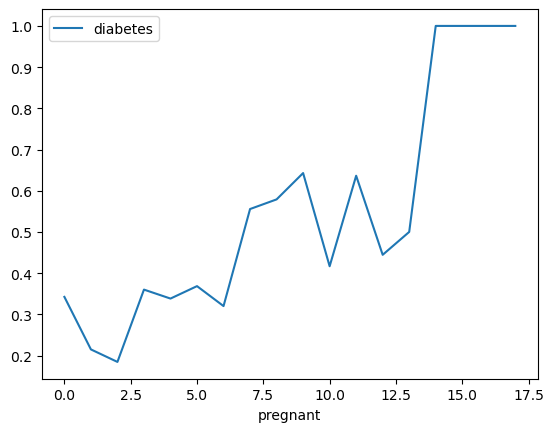

In [20]:
temp2.plot();

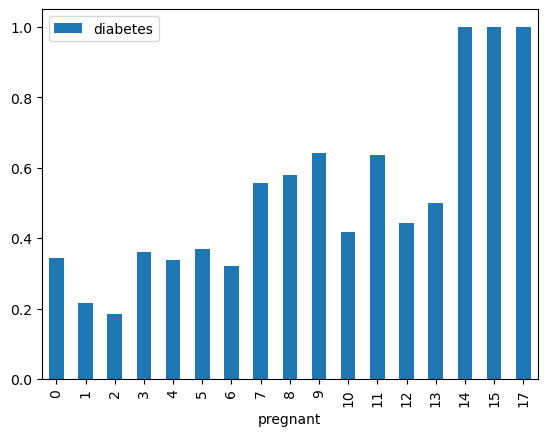

In [21]:
temp2.plot(kind='bar');

[ 분석 ]  임신횟수가 14번 이상이면 당뇨병에 걸릴 확률이 100%인가? 

임신횟수가 14번 이상인 경우가 몇 건 없는데 당뇨병이라고 하여 이를 확정할 수 있나???`0

적어도 집단의 비율이 동일해야 예를 들어

1 ~ 3명 / 4 ~ 6명 / 7 ~ 9명 / 10 ~ 12명 / 13 ~ 이상명을 임신횟수를 가진 사람들을 각 집단에 100명씩 조사한 결과라던가 

[ 추가 고민 ] 임신횟수별 인원수를 구해서 나누면 되지 않을까나

In [22]:
# 임신횟수가 14번 이상인 경우 확인
df[df['pregnant']>=14]

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,diabetes
88,15,136,70,32,110,37.1,0.153,43,1
159,17,163,72,41,114,40.9,0.817,47,1
298,14,100,78,25,184,36.6,0.412,46,1
455,14,175,62,30,0,33.6,0.212,38,1


In [23]:
# 임신횟수당 인원수 확인
df['pregnant'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: pregnant, dtype: int64